In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_excel("placement.xlsx")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [64]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

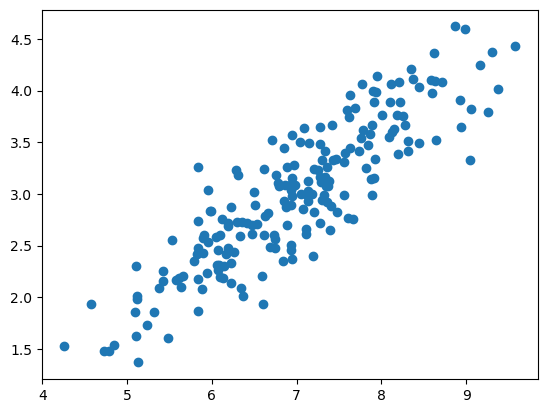

In [65]:
plt.scatter(df['cgpa'],df["package"]);

In [66]:
df.corr() # range is -1 to +1 

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


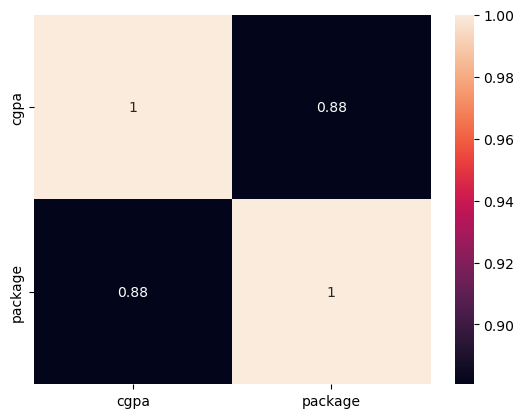

In [67]:
sns.heatmap(df.corr(),annot=True);

In [68]:
x=df[["cgpa"]]
y=df["package"]

In [69]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [70]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [73]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(160, 1) (160,)
(40, 1) (40,)


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr=LinearRegression()
lr.fit(x_train,y_train) # Training 

LinearRegression()

In [76]:
m=lr.coef_
m

array([0.55795197])

In [77]:
b=lr.intercept_
b

-0.8961119222429144

In [78]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)


In [79]:
print(x_train.head(1))
print(y_train.head(1))

     cgpa
137  7.14
137    3.13
Name: package, dtype: float64


In [80]:
print(x_test.head(1))
print(y_test.head(1))

     cgpa
112  8.58
112    4.1
Name: package, dtype: float64


In [107]:
lr.predict([[8.58]])

array([3.89111601])

In [117]:
m*int(input("Enter x"))+b

Enter x 6


array([2.45159992])

In [105]:
import warnings 
warnings .filterwarnings("ignore")

In [119]:
y_pred_test

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [ ]:
#Performance metrices

In [123]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score

In [127]:
print("mse on test data",mse(y_test,y_pred_test))
print("mse on train data",mse(y_train,y_pred_train))

mse on test data 0.12129235313495527
mse on train data 0.10345460923452962


In [129]:
print("Rmse on test data",np.sqrt(mse(y_test,y_pred_test)))  # Or power **0.5
print("Rmse on train data",np.sqrt(mse(y_train,y_pred_train)))

Rmse on test data 0.34827051717731616
Rmse on train data 0.3216436059282535


In [131]:
r2_score(y_train,y_pred_train)

0.7733110961245032

In [133]:
r2_score(y_test,y_pred_test)

0.780730147510384

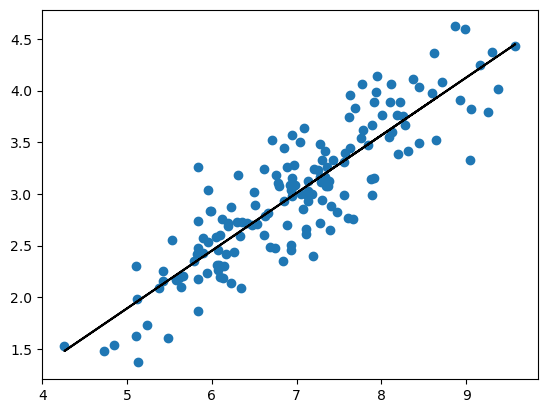

In [141]:
plt.scatter(x_train["cgpa"],y_train)
plt.plot(x_train["cgpa"],lr.predict(x_train),color="k");

In [ ]:
# the inability of ml model to fit the training data well..

In [ ]:
# the performance of my ml model when the training data is change..